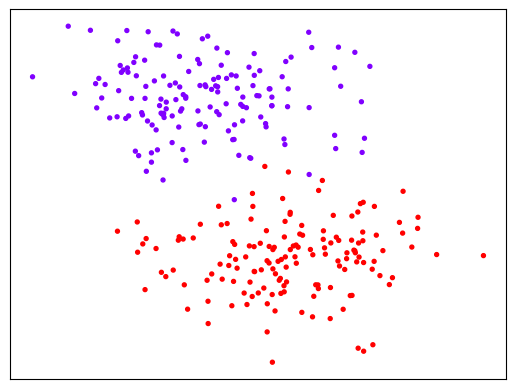

In [1]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
x,y = make_blobs(n_samples = 300, centers = 2, random_state = 0, cluster_std = 0.8)
plt.scatter(x[:,0],x[:,1], c = y, s = 8, cmap = "rainbow")
plt.xticks([])
plt.yticks([])
plt.show()

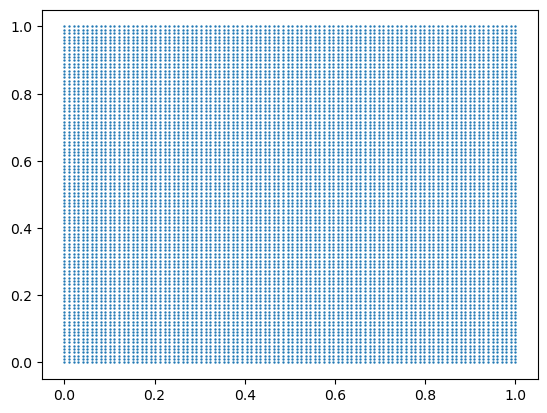

In [2]:
sub_plot = plt.gca()#获取当前子图
#在子图的基础上制作网格(网格上的点用于绘制等高线)
xlim = sub_plot.get_xlim()#获取横,纵坐标最大值和最小值
ylim = sub_plot.get_ylim()
x_grid_points = np.linspace(xlim[0],xlim[1],100) #在x,y轴上生成100个规律数据
y_grid_points = np.linspace(ylim[0],ylim[1],100)
#将生成的1000,1000个点变为网格(两个一维向量转换为二维的100*100特征矩阵)
#其中第一项纵向填充,第二项横向填充
y_grid,x_grid = np.meshgrid(y_grid_points,x_grid_points)
#ravel拉平(降维),将x_grid,y_grid拉平为100*100=10000个一维数据
#vstack将结构一致的点堆叠
xy_grid = np.vstack([x_grid.ravel(),y_grid.ravel()]).T
plt.scatter(xy_grid[:,0],xy_grid[:,1],s = 0.5) #均匀取出10000个点

In [3]:
a = np.array([1,2,3])
b = np.array([7,8])
v1,v2 = np.meshgrid(a,b)
#a为纵向填充,b为横向填充
print(v1);print(v2)

[[1 2 3]
 [1 2 3]]
[[7 7 7]
 [8 8 8]]


In [4]:
print(v1.ravel());print(v2.ravel())

[1 2 3 1 2 3]
[7 7 7 8 8 8]


In [5]:
v = np.vstack([v1.ravel(),v2.ravel()]).T
v

array([[1, 7],
       [2, 7],
       [3, 7],
       [1, 8],
       [2, 8],
       [3, 8]])

In [6]:
#建模
#找数据的决策边界
decision_surf = SVC(kernel = "linear").fit(x,y)
#decision_function计算所有10000个点到决策边界的距离
#并转换为100*100的格式
height = decision_surf.decision_function(xy_grid).reshape(x_grid.shape)
#contour 等高线绘制(x,y为横坐标取值,z所有的点所对应的高度,levels对应级别的等高线)
sub_plot.contour(x_grid_points,y_grid_points,
           height,
           levels = [-1,0,1],
           alpha = 0.5,
           linestyles = ["--","-","--"]
          )
sub_plot.set_xlim(xlim)
sub_plot.set_ylim(ylim)

(0.0, 1.0)

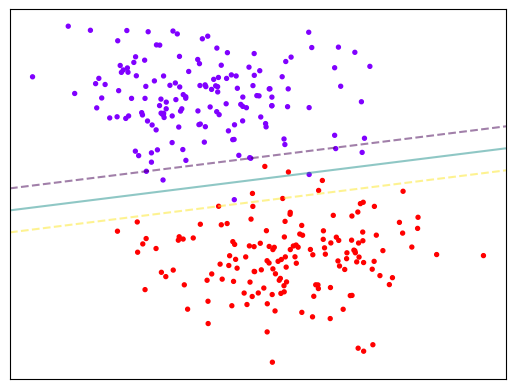

In [7]:
#显示图(纯代码)
x,y = make_blobs(n_samples = 300, centers = 2, random_state = 0, cluster_std = 0.8)
plt.scatter(x[:,0],x[:,1], c = y, s = 8, cmap = "rainbow")
plt.xticks([])
plt.yticks([])
sub_plot = plt.gca()
xlim = sub_plot.get_xlim()
ylim = sub_plot.get_ylim()
x_grid_points = np.linspace(xlim[0],xlim[1],100)
y_grid_points = np.linspace(ylim[0],ylim[1],100)
y_grid,x_grid = np.meshgrid(y_grid_points,x_grid_points)
xy_grid = np.vstack([x_grid.ravel(),y_grid.ravel()]).T
decision_surf = SVC(kernel = "linear").fit(x,y)
height = decision_surf.decision_function(xy_grid).reshape(x_grid.shape)
sub_plot.contour(x_grid,y_grid,
           height,
           levels = [-1,0,1],
           alpha = 0.5,
           linestyles = ["--","-","--"]
          )
sub_plot.set_xlim(xlim)
sub_plot.set_ylim(ylim)
plt.show()

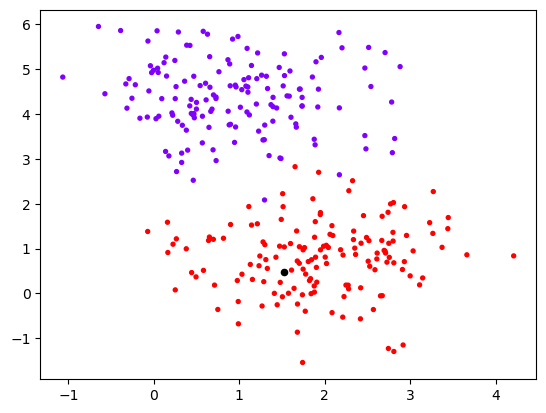

In [8]:
plt.scatter(x[:,0],x[:,1],c = y,s = 8, cmap = "rainbow")
plt.scatter(x[100,0],x[100,1],c = "black",s = 20)

In [9]:
#计算黑色点(第100个点)到决策平面距离
height_100 = decision_surf.decision_function(x[100].reshape(1,2))
height_100

array([4.16172169])

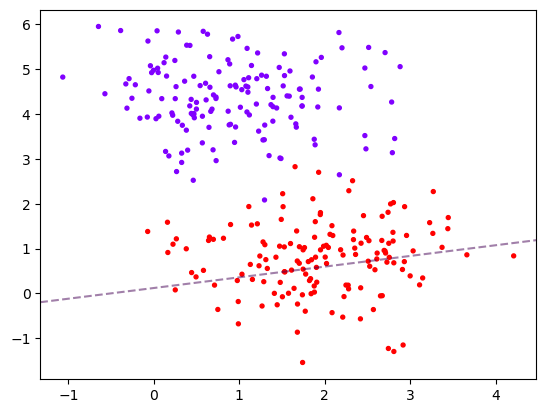

In [10]:
#绘制该点等高线
plt.scatter(x[:,0],x[:,1],c = y,s = 8, cmap = "rainbow")
sub_plot = plt.gca()
sub_plot.contour(x_grid,y_grid,height,
           levels = [height_100[0]],
           alpha = 0.5,
           linestyles = ["--"]
          )

In [11]:
#module制作
def plot_svc_decision_function(model,sub_plot = None): #需要输入的参数:model
    if sub_plot is None:
        sub_plot = plt.gca()
    xlim = sub_plot.get_xlim()
    ylim = sub_plot.get_ylim()
    x_points = np.linspace(xlim[0],xlim[1],100)
    y_points = np.linspace(ylim[0],ylim[1],100)
    y_grid,x_grid = np.meshgrid(y_points,x_points)
    xy_grid = np.vstack([x_grid.ravel(),y_grid.ravel()]).T
    height = model.decision_function(xy_grid).reshape(x_grid.shape)
    sub_plot.contour(x_grid,y_grid,
          height,
          levels = [-1,0,1],
          alpha = 0.5,
          linestyles = ["--","-","--"]
          )
    sub_plot.set_xlim(xlim)
    sub_plot.set_ylim(ylim)

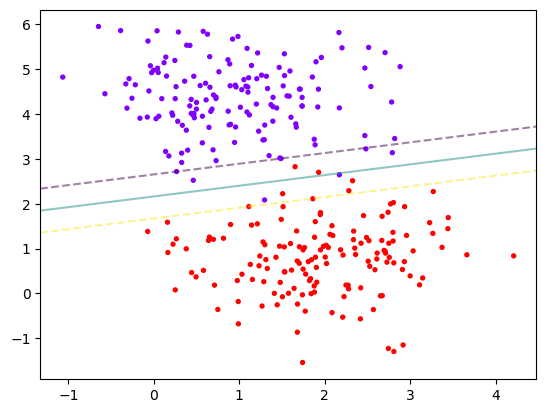

In [12]:
#module运行
model = SVC(kernel = "linear").fit(x,y)
plt.scatter(x[:,0],x[:,1],c = y, s = 8, cmap = "rainbow")
plot_svc_decision_function (model)

In [13]:
#探索建好的模型
model.predict(x) #分类结果 300个

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [14]:
model.score(x,y) #准确率

0.9866666666666667

In [15]:
model.support_vectors_ #支持向量上点的坐标

array([[1.29550716, 2.08571312],
       [0.46137536, 2.52506481],
       [2.48279064, 3.22558008],
       [2.17185771, 2.64779931],
       [2.79207378, 3.14029479],
       [0.26604148, 2.71915015],
       [1.4883753 , 3.01022249],
       [2.32639082, 2.51449851],
       [2.28269126, 2.29179868],
       [1.92913391, 2.70304246],
       [1.11194118, 1.93880612],
       [1.5080588 , 2.2253043 ],
       [1.65301416, 2.8276266 ]])

In [16]:
model.n_support_ #每个类中支持向量个数

array([7, 6])

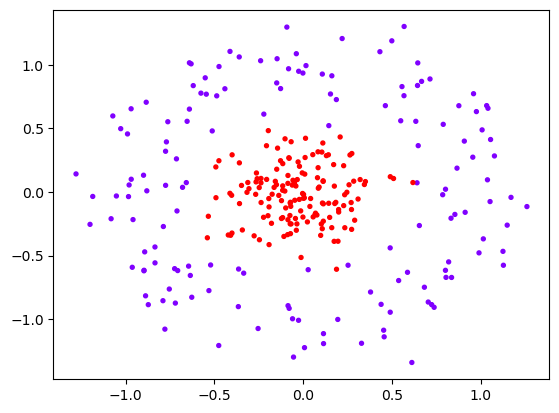

In [17]:
#如果数据为环形
from sklearn.datasets import make_circles
x,y = make_circles(300,factor = 0.1, noise = .2)
plt.scatter(x[:,0],x[:,1],c = y, s = 8, cmap = "rainbow")

In [18]:
#将数据变为3维,新维度为r
z = np.exp(-(x**2).sum(1))
zlim = np.linspace(min(z),max(z),1000)
print(z.shape); print(zlim.shape)

(300,)
(1000,)


In [19]:
from mpl_toolkits import mplot3d
#定义绘制3维图像的函数
#elev为上下旋转的角度
#azim为平行旋转的角度
def plot_3D(elev = 30, azim = 40, x = x, y = y):
    sub_plot = plt.subplot(projection = "3d")
    sub_plot.scatter3D(x[:,0],x[:,1],z,
                      c = y,
                      s = 10,
                      cmap = "rainbow"
                      ) #3D点图生成
    sub_plot.view_init(elev = elev,
                      azim = azim
                      ) #调整上下平行旋转角度
    sub_plot.set_xlabel("x")
    sub_plot.set_ylabel("y")
    sub_plot.set_zlabel("z")
    plt.show()

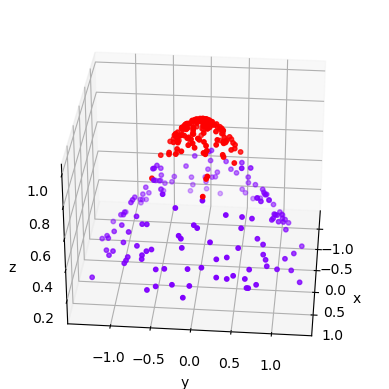

In [20]:
plot_3D(azim = 5)

0.9866666666666667

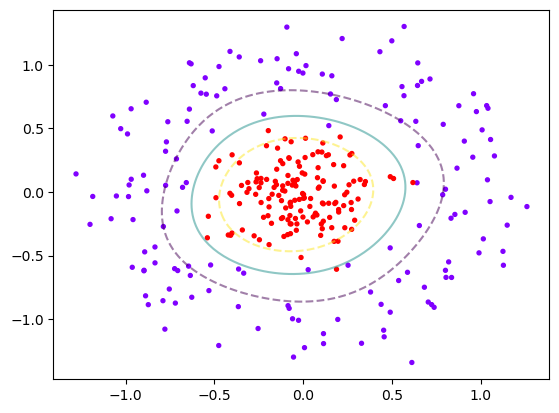

In [21]:
#module运行
clf = SVC(kernel = "rbf").fit(x,y)
plt.scatter(x[:,0],x[:,1],c = y, s = 8, cmap = "rainbow")
plot_svc_decision_function (clf)
clf.score(x,y)

In [22]:
##选取最佳kernal
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles,make_moons,make_blobs,make_classification

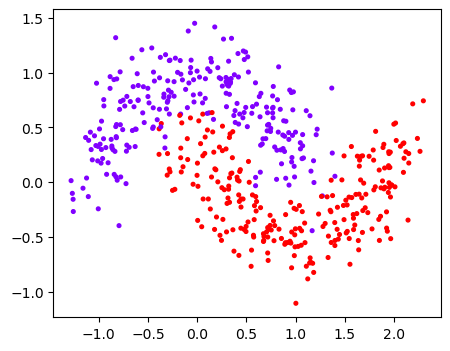

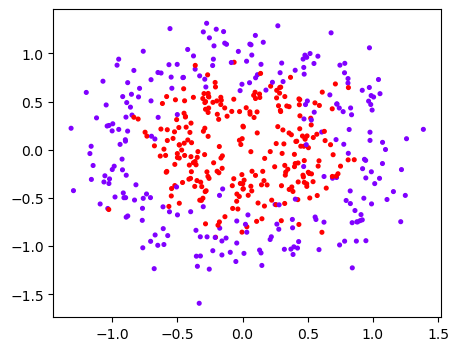

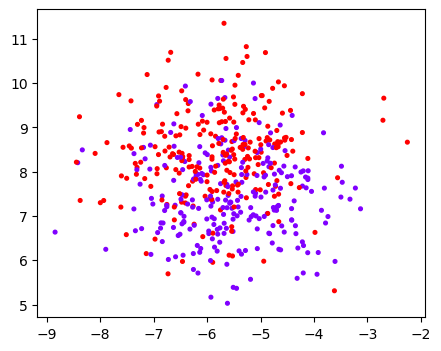

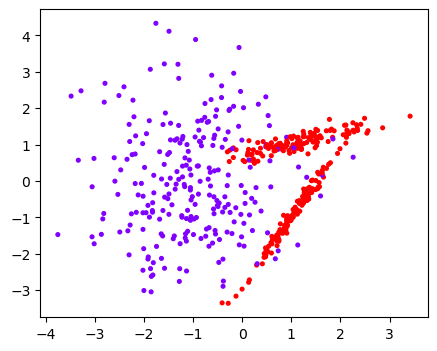

In [23]:
n_samples = 500
datasets = [
    make_moons (n_samples = n_samples,noise = 0.2, random_state = 0),
    make_circles (n_samples = n_samples,noise = 0.2, factor = 0.5, random_state = 1),
    make_blobs (n_samples = n_samples,centers = 2, random_state = 5),
    make_classification (n_samples = n_samples,n_features = 2, n_informative =2, n_redundant = 0)
]

Kernel = ["linear","poly","rbf","sigmoid"]

for x,y in datasets:
    plt.figure(figsize = (5,4))
    plt.scatter(x[:,0],x[:,1],c = y, s = 7, cmap = "rainbow")

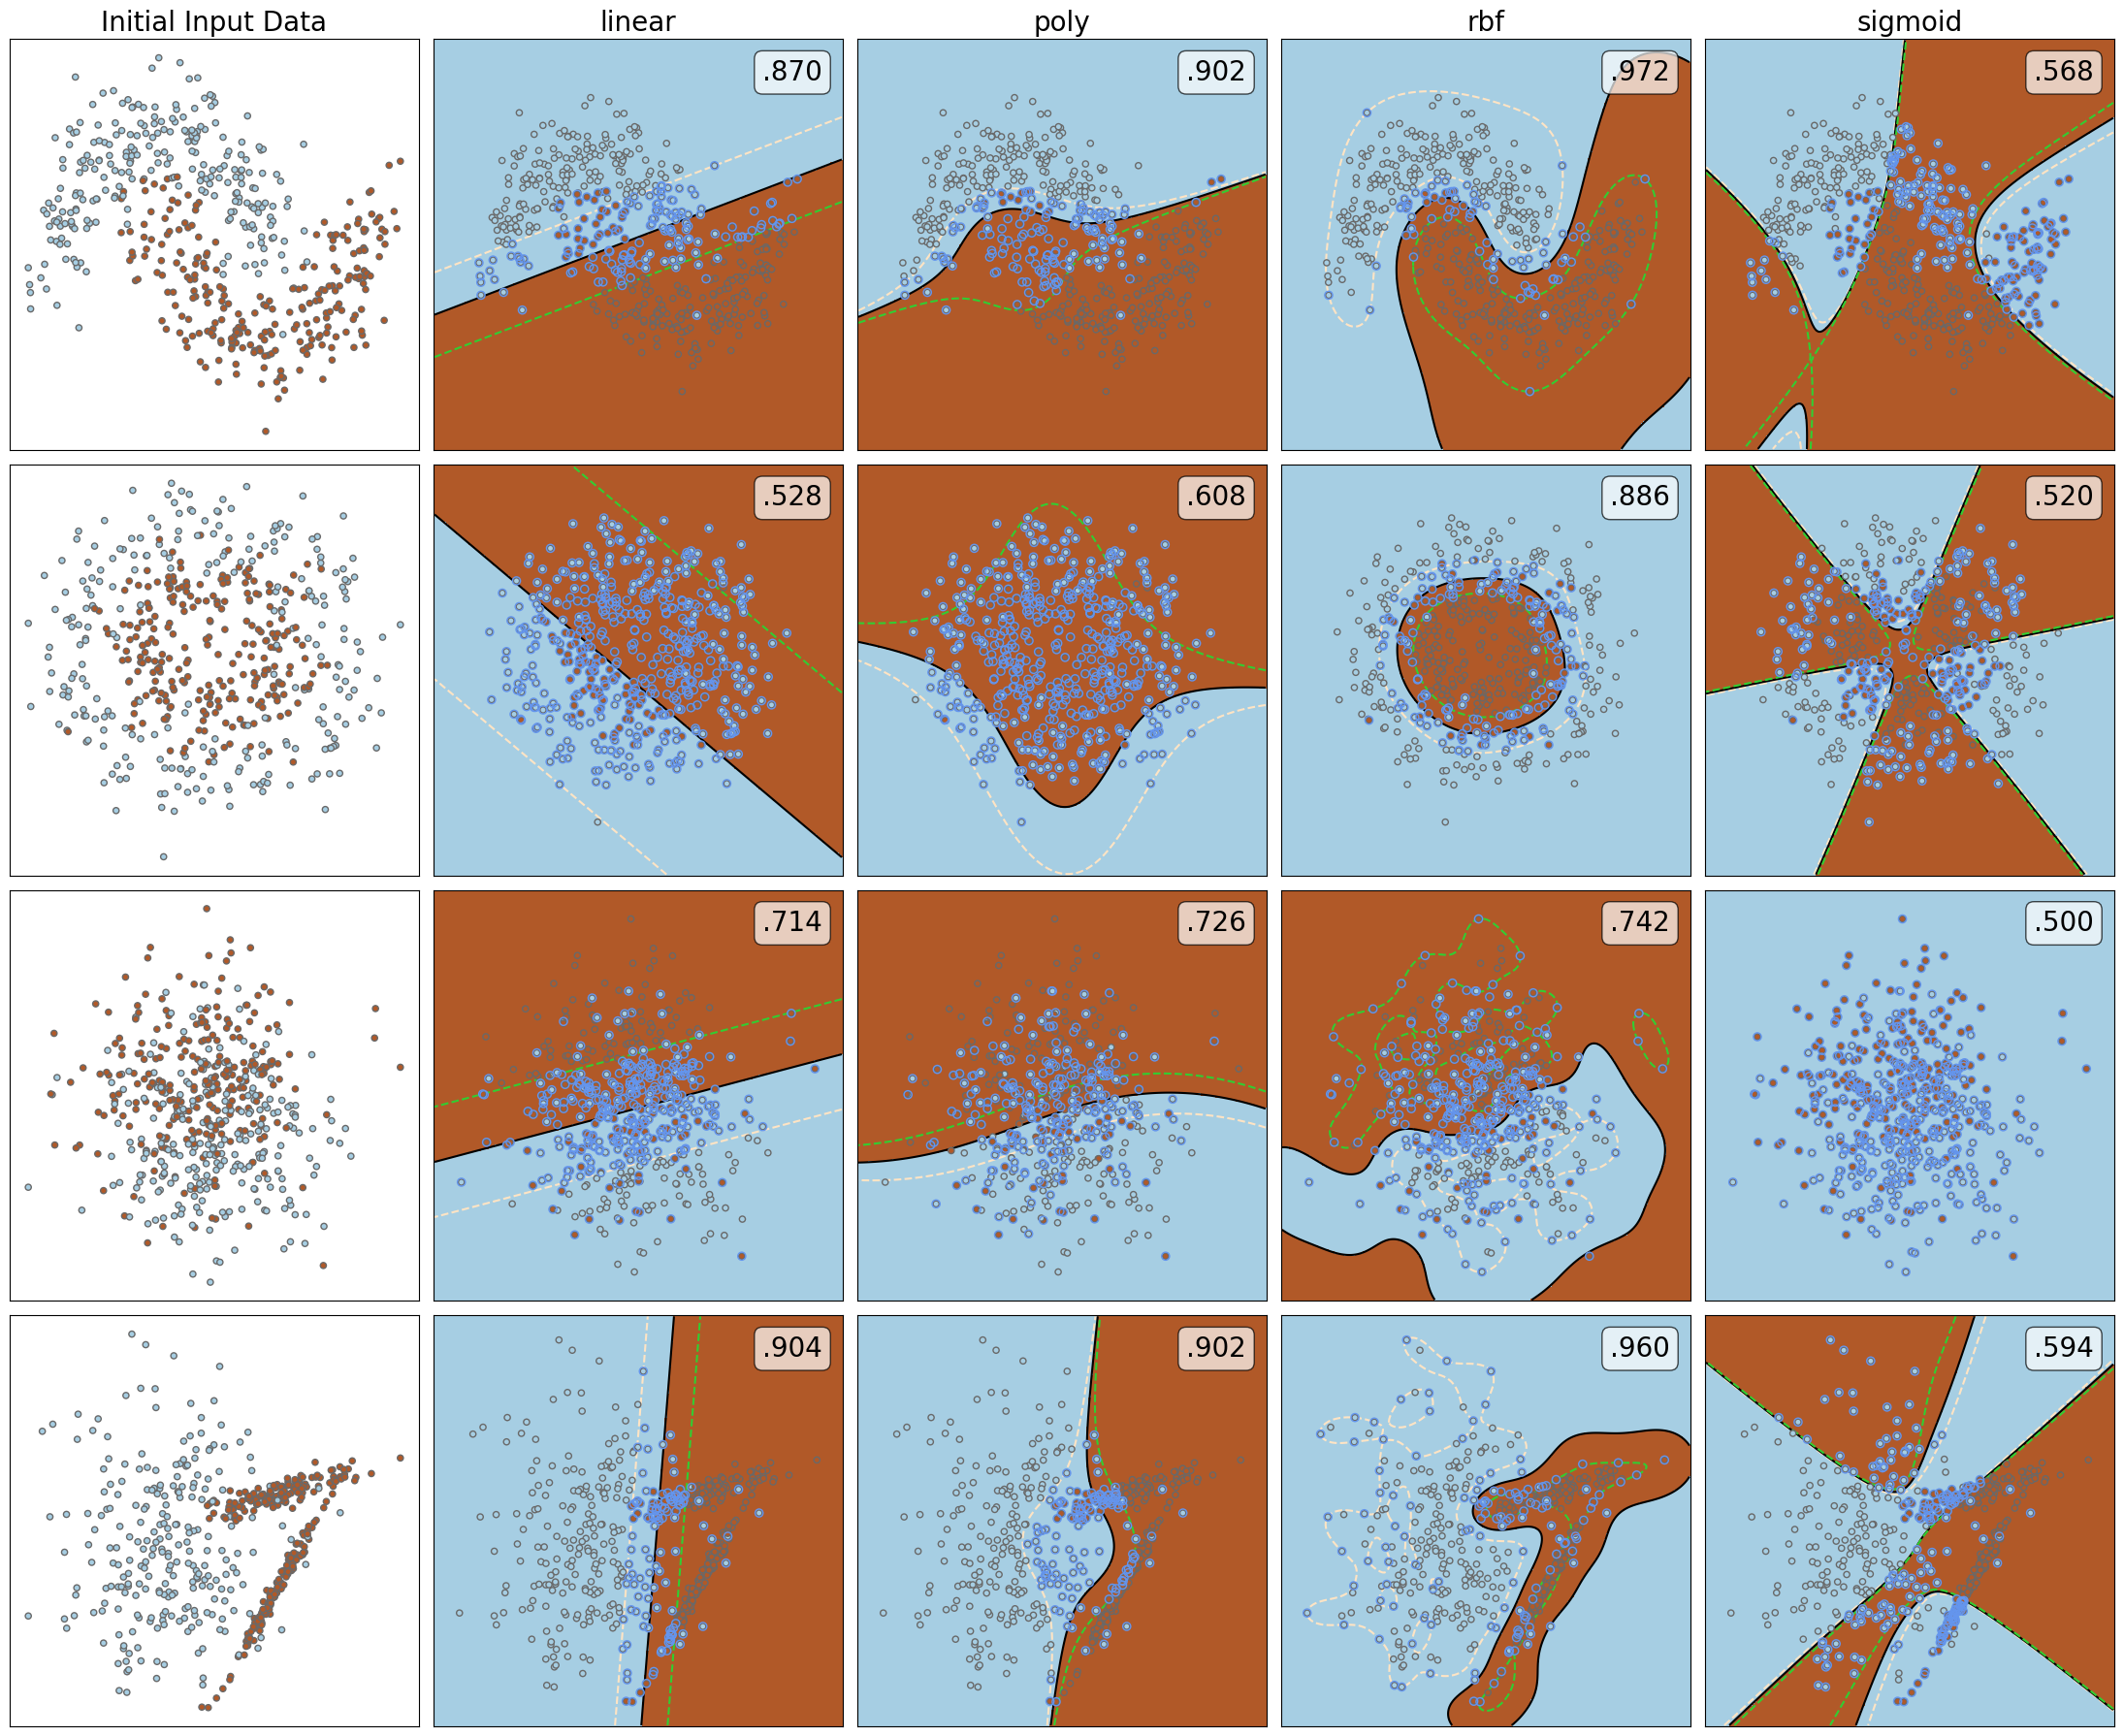

In [24]:
#构建5*4个子图
Kernel = ["linear","poly","rbf","sigmoid"]
nrow = len(datasets)
ncols = len(Kernel) + 1
fig, axes = plt.subplots(nrow,ncols,figsize = (22,18))
#第一层循环:输入原始dataset
#[*enumerate(datasets)] is equal to [(0, dataset_1), (1, dataset_2), (2, dataset_3), (3, dataset_4)]
#[*enumerate(datasets)] = index, (x,y) = [索引,array([特征矩阵x],[标签y])]
for index_datasets, (x,y) in enumerate(datasets):
    sub_plot = axes[index_datasets, 0] #绘制子图为(第索引行,第0列)
    if index_datasets == 0:
        sub_plot.set_title("Initial Input Data",
                           fontdict={'fontsize': 20}
                          )#绘制标题
    sub_plot.scatter(x[:,0],x[:,1],c = y,
               s = 20,
               zorder = 10, #让图像显示在哪个图层上
               cmap = plt.cm.Paired,
               edgecolors = "dimgrey"
              )
    sub_plot.set_xticks(())
    sub_plot.set_yticks(())
    
    #第二层循环:在后续子图上填充不同算法output
    #[*enumerate(Kernal)] output [(0, 'linear'), (1, 'poly'), (2, 'rbf'), (3, 'sigmoid')]
    for index_kernel, kernel in enumerate(Kernel):
        sub_plot = axes[index_datasets,index_kernel + 1] #绘制子图位置(第dataset索引行,第kernal索引列+1)
        model = SVC (kernel = kernel, gamma = 2).fit(x,y)#建模
        score = model.score(x,y)
        sub_plot.scatter(x[:,0],x[:,1], c = y,
                   s = 20,
                   zorder = 10,
                   cmap = plt.cm.Paired,
                   edgecolors = "dimgrey"
                  )#绘制本身散点图
        sub_plot.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                   s = 35,
                   facecolors = "none",
                   zorder = 10,
                   edgecolors = "cornflowerblue"
                  ) #绘制支持向量
        
        #绘制决策边界
        x_min,x_max = x[:,0].min() - .5,x[:,0].max() + .5
        y_min,y_max = x[:,1].min() - .5,x[:,1].max() + .5
        #np.mgrid 整合了np.linspace和np.meshgrid (np.mgrid[起始:结束:步长]) (j表示包括虚数单位)
        x_grid,y_grid = np.mgrid[x_min:x_max:200j,y_min:y_max:200j]
        height = model.decision_function(np.c_[x_grid.ravel(),y_grid.ravel()]).reshape(x_grid.shape)
        #绘制由决策边界区分的不同区域的颜色
        sub_plot.pcolormesh(x_grid,y_grid,height > 0, cmap = plt.cm.Paired)
        sub_plot.contour(x_grid,y_grid,height,
                            colors = ['bisque','k','limegreen'],
                            linestyles = ['--','-','--'],
                            levels = [-1,0,1]
                            )
        sub_plot.set_xticks(())
        sub_plot.set_yticks(())
        if index_datasets == 0:
            sub_plot.set_title(kernel,
                               fontdict={'fontsize': 20}
                              )#绘制kernel标题
        sub_plot.text(0.95,0.90,('%.3f' % score).lstrip('0'),#保留三位小数,去除0
                      size = 20,
                      bbox = dict(boxstyle = 'round',alpha = 0.7, facecolor = 'white'),#生成白方框作为背景
                      transform = sub_plot.transAxes,#基于子图的坐标轴
                      horizontalalignment = 'right'
                     )

plt.tight_layout() #图像间间隔降低
plt.show()

In [25]:
#第一层循环:输入原始dataset
#[*enumerate(datasets)] is equal to [(0, dataset_1), (1, dataset_2), (2, dataset_3), (3, dataset_4)]
#[*enumerate(datasets)] = index, (x,y) = [索引,array([特征矩阵x],[标签y])]
for index_datasets, (x,y) in enumerate(datasets):
    sub_plot = axes[index_datasets, 0] #绘制子图为(第索引行,第0列)
    if index_datasets == 0:
        sub_plot.set_title("Initial Input Data") #绘制标题
    sub_plot.scatter(x[:,0],x[:,1],c = y,
               s = 13,
               zorder = 10, #让图像显示在哪个图层上
               cmap = plt.cm.Paired,
               edgecolors = "grey"
              )
    sub_plot.set_xticks(())
    sub_plot.set_yticks(())

In [26]:
#第二层循环:在后续子图上填充不同算法output
#[*enumerate(Kernal)] output [(0, 'linear'), (1, 'poly'), (2, 'rbf'), (3, 'sigmoid')]
    for index_kernel, kernel in enumerate(Kernel):
        sub_plot = axes[index_datasets,index_kernel + 1] #绘制子图位置(第dataset索引行,第kernal索引列+1)
        model = SVC (kernel = kernel, gamma = 2).fit(x,y)#建模
        score = model.score(x,y)
        sub_plot.scatter(x[:,0],x[:,1], c = y,
                   s = 13,
                   zorder = 10,
                   cmap = plt.cm.Paired,
                   edgecolors = "grey"
                  )#绘制本身散点图
        sub_plot.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                   s = 25,
                   facecolors = "none",
                   zorder = 10,
                   edgecolors = "grey"
                  ) #绘制支持向量

IndentationError: unexpected indent (2826509097.py, line 3)

In [27]:
#绘制决策边界
x_min,x_max = x[:,0].min() - .5,x[:,0].max() + .5
y_min,y_max = x[:,1].min() - .5,x[:,1].max() + .5
#np.mgrid 整合了np.linspace和np.meshgrid (np.mgrid[起始:结束:步长]) (j表示包括虚数单位)
x_grid,y_grid = np.mgrid[x_min:x_max:200j,y_min:y_max:200j]
height = model.decision_function(np.c_[x_grid.ravel(),y_grid.ravel()]).reshape(x_grid.shape)
#绘制由决策边界区分的不同区域的颜色
sub_plot.pcolormesh(x_grid,y_grid,height > 0, cmap = plt.cm.Paired)
sub_plot.contour(x_grid,y_grid,height,
                colors = ['grey','k','grey'],
                linestyles = ['--','-','--'],
                levels = [-1,0,1]
                )
sub_plot.set_xticks(())
sub_plot.set_yticks(())

[]

In [28]:
########实际使用svm#########
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime
import pandas as pd
data = load_breast_cancer()
x = data.data
y = data.target

In [29]:
print(x.shape);print(y.shape)

(569, 30)
(569,)


In [30]:
np.unique(y)

array([0, 1])

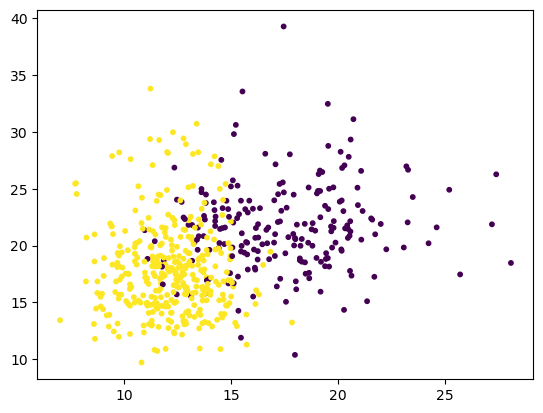

In [31]:
plt.scatter(x[:,0],x[:,1],c=y,s=10)
plt.show()

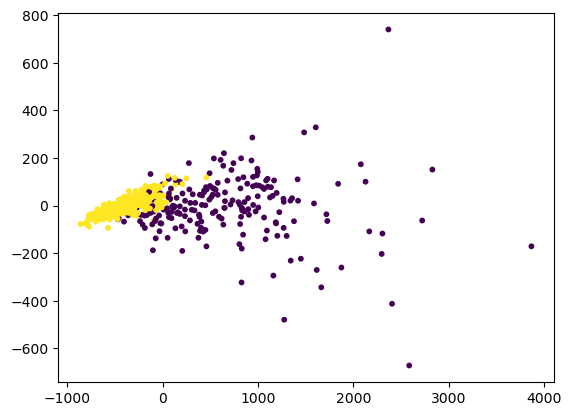

In [32]:
from sklearn.decomposition import PCA
x_pca = PCA(2).fit_transform(x)
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,s=10)
plt.show()

In [33]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 420)
Kernel = ["linear","rbf","poly","sigmoid"]
for kernel in Kernel:
    time0 = time()
    model = SVC(kernel = kernel,
                gamma = "auto",
                degree = 2, #多项式次数(1,2可以跑出来)
                cache_size = 5000 #MB
               ).fit(xtrain,ytrain)
    print("The accuracy under Kernel %s is %f" % (kernel,model.score(xtest,ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
    
    #结果说明1.乳腺癌数据集为线性数据集
    #       2.rbf和sigmoid两个非线性效果不好
    #       3.多项式核函数和线性核函数较慢

The accuracy under Kernel linear is 0.929825
00:00:409454
The accuracy under Kernel rbf is 0.596491
00:00:031327
The accuracy under Kernel poly is 0.947368
00:12:631132
The accuracy under Kernel sigmoid is 0.596491
00:00:000799


In [34]:
now = time()
datetime.datetime.fromtimestamp(now).strftime("%Y-%m-%d,%H:%M:%S:%f")

'2023-05-07,23:01:46:700021'

In [35]:
data = pd.DataFrame(x)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T
#结果可见1.量纲不统一
#       2.特征13,23有偏态的问题
#       3.可以对数据标准化

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,14.127292,3.524049,6.981000,8.458360,9.529200,10.260000,11.700000,13.370000,15.780000,19.530000,24.371600,28.11000
1,569.0,19.289649,4.301036,9.710000,10.930400,13.088000,14.078000,16.170000,18.840000,21.800000,24.992000,30.652000,39.28000
2,569.0,91.969033,24.298981,43.790000,53.827600,60.496000,65.830000,75.170000,86.240000,104.100000,129.100000,165.724000,188.50000
3,569.0,654.889104,351.914129,143.500000,215.664000,275.780000,321.600000,420.300000,551.100000,782.700000,1177.400000,1786.600000,2501.00000
4,569.0,0.096360,0.014064,0.052630,0.068654,0.075042,0.079654,0.086370,0.095870,0.105300,0.114820,0.132888,0.16340
5,569.0,0.104341,0.052813,0.019380,0.033351,0.040660,0.049700,0.064920,0.092630,0.130400,0.175460,0.277192,0.34540
6,569.0,0.088799,0.079720,0.000000,0.000000,0.004983,0.013686,0.029560,0.061540,0.130700,0.203040,0.351688,0.42680
7,569.0,0.048919,0.038803,0.000000,0.000000,0.005621,0.011158,0.020310,0.033500,0.074000,0.100420,0.164208,0.20120
8,569.0,0.181162,0.027414,0.106000,0.129508,0.141500,0.149580,0.161900,0.179200,0.195700,0.214940,0.259564,0.30400
9,569.0,0.062798,0.007060,0.049960,0.051504,0.053926,0.055338,0.057700,0.061540,0.066120,0.072266,0.085438,0.09744


In [36]:
#数据标准化
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
data = pd.DataFrame(x)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,-3.153111e-15,1.00088,-2.029648,-1.610057,-1.305923,-1.098366,-0.689385,-0.215082,0.469393,1.534446,2.909529,3.971288
1,569.0,-6.568462e-15,1.00088,-2.229249,-1.945253,-1.443165,-1.212786,-0.725963,-0.104636,0.584176,1.326975,2.644095,4.651889
2,569.0,-6.993039e-16,1.00088,-1.984504,-1.571053,-1.296381,-1.076672,-0.691956,-0.235980,0.499677,1.529432,3.037982,3.976130
3,569.0,-8.553985e-16,1.00088,-1.454443,-1.249201,-1.078225,-0.947908,-0.667195,-0.295187,0.363507,1.486075,3.218702,5.250529
4,569.0,6.081447e-15,1.00088,-3.112085,-1.971730,-1.517125,-1.188910,-0.710963,-0.034891,0.636199,1.313694,2.599511,4.770911
5,569.0,-1.136369e-15,1.00088,-1.610136,-1.345369,-1.206849,-1.035527,-0.747086,-0.221940,0.493857,1.347811,3.275782,4.568425
6,569.0,-2.997017e-16,1.00088,-1.114873,-1.114873,-1.052316,-0.943046,-0.743748,-0.342240,0.526062,1.434288,3.300560,4.243589
7,569.0,1.023981e-15,1.00088,-1.261820,-1.261820,-1.116837,-0.974010,-0.737944,-0.397721,0.646935,1.328412,2.973759,3.927930
8,569.0,-1.860648e-15,1.00088,-2.744117,-1.885853,-1.448032,-1.153036,-0.703240,-0.071627,0.530779,1.233221,2.862418,4.484751
9,569.0,-1.504752e-15,1.00088,-1.819865,-1.600987,-1.257643,-1.057477,-0.722639,-0.178279,0.470983,1.342243,3.209454,4.910919


In [37]:
#数据标准化很重要
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 420)
Kernel = ["linear","rbf","poly","sigmoid"]
for kernel in Kernel:
    time0 = time()
    model = SVC(kernel = kernel,
                gamma = "auto",
                degree = 3,
                cache_size = 5000
               ).fit(xtrain,ytrain)
    print("The accuracy under Kernel %s is %f" % (kernel,model.score(xtest,ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under Kernel linear is 0.976608
00:00:004566
The accuracy under Kernel rbf is 0.970760
00:00:012161
The accuracy under Kernel poly is 0.894737
00:00:005001
The accuracy under Kernel sigmoid is 0.953216
00:00:003000


0.9766081871345029 0.012915496650148827


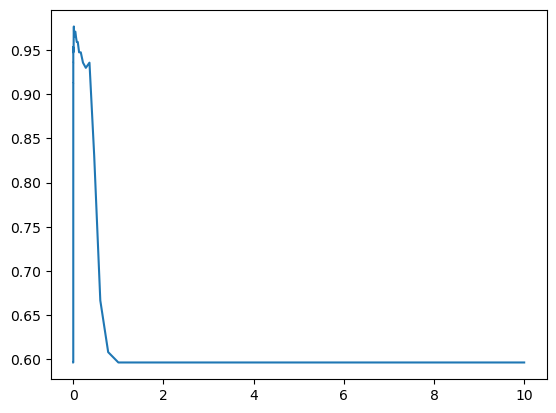

In [38]:
#kernel rbf,poly可以调参
#1.画gamma的学习曲线
score = []
gamma_range = np.logspace(-10,1,100)
for i in gamma_range:
    model = SVC(kernel = "rbf",gamma = i, cache_size = 5000).fit(xtrain,ytrain)
    score.append(model.score(xtest,ytest))
print(max(score),gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.show()

In [41]:
#2.画poly核函数的学习曲线
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
time0 = time()

gamma_range = np.logspace(-10,1,100)
coef_range = np.linspace(0,5,10)
#规定参数字典
param_grid = dict(gamma = gamma_range,
                  coef0 = coef_range,
                 )
#输入交叉验证模式
cv = StratifiedShuffleSplit(n_splits = 5,
                            test_size = 0.2,
                            random_state = 420
                           )
#交叉验证
grid = GridSearchCV(SVC(kernel = 'poly',cache_size = 5000,degree = 1),
                    param_grid = param_grid,
                    cv = cv
                   )
grid.fit(x,y)

print ("Poly degree: %a Best parameters: %s Score: %0.6f" % (1,grid.best_params_,grid.best_score_))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

Poly degree: 1 Best parameters: {'coef0': 0.0, 'gamma': 0.16681005372000557} Score: 0.978947
00:32:066217


In [42]:
#重复,degree变为2
time0 = time()
gamma_range = np.logspace(-10,1,100)
coef_range = np.linspace(0,5,10)
param_grid = dict(gamma = gamma_range,
                  coef0 = coef_range,
                 )
cv = StratifiedShuffleSplit(n_splits = 5,
                            test_size = 0.2,
                            random_state = 420
                           )
grid = GridSearchCV(SVC(kernel = 'poly',cache_size = 5000,degree = 2),
                    param_grid = param_grid,
                    cv = cv
                   )
grid.fit(x,y)
print ("Poly degree: %a Best parameters: %s Score: %0.6f" % (2,grid.best_params_,grid.best_score_))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

Poly degree: 2 Best parameters: {'coef0': 1.6666666666666667, 'gamma': 0.02782559402207126} Score: 0.975439
00:50:206999


In [43]:
#重复,degree变为3
time0 = time()
gamma_range = np.logspace(-10,1,100)
coef_range = np.linspace(0,5,10)
param_grid = dict(gamma = gamma_range,
                  coef0 = coef_range,
                 )
cv = StratifiedShuffleSplit(n_splits = 5,
                            test_size = 0.2,
                            random_state = 420
                           )
grid = GridSearchCV(SVC(kernel = 'poly',cache_size = 5000,degree = 3),
                    param_grid = param_grid,
                    cv = cv
                   )
grid.fit(x,y)
print ("Poly degree: %a Best parameters: %s Score: %0.6f" % (3,grid.best_params_,grid.best_score_))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

Poly degree: 3 Best parameters: {'coef0': 0.5555555555555556, 'gamma': 0.046415888336127725} Score: 0.977193
00:33:674420


In [44]:
#重复,degree变为4
time0 = time()
gamma_range = np.logspace(-10,1,100)
coef_range = np.linspace(0,5,10)
param_grid = dict(gamma = gamma_range,
                  coef0 = coef_range,
                 )
cv = StratifiedShuffleSplit(n_splits = 5,
                            test_size = 0.2,
                            random_state = 420
                           )
grid = GridSearchCV(SVC(kernel = 'poly',cache_size = 5000,degree = 4),
                    param_grid = param_grid,
                    cv = cv
                   )
grid.fit(x,y)
print ("Poly degree: %a Best parameters: %s Score: %0.6f" % (4,grid.best_params_,grid.best_score_))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

Poly degree: 4 Best parameters: {'coef0': 3.8888888888888893, 'gamma': 0.0005994842503189409} Score: 0.978947
00:42:228271


In [45]:
#重复,degree变为5
time0 = time()
gamma_range = np.logspace(-10,1,100)
coef_range = np.linspace(0,5,10)
param_grid = dict(gamma = gamma_range,
                  coef0 = coef_range,
                 )
cv = StratifiedShuffleSplit(n_splits = 5,
                            test_size = 0.2,
                            random_state = 420
                           )
grid = GridSearchCV(SVC(kernel = 'poly',cache_size = 5000,degree = 5),
                    param_grid = param_grid,
                    cv = cv
                   )
grid.fit(x,y)
print ("Poly degree: %a Best parameters: %s Score: %0.6f" % (5,grid.best_params_,grid.best_score_))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

Poly degree: 5 Best parameters: {'coef0': 2.7777777777777777, 'gamma': 0.00046415888336127724} Score: 0.978947
00:36:813021


In [46]:
#重复,degree变为6
time0 = time()
gamma_range = np.logspace(-10,1,100)
coef_range = np.linspace(0,5,10)
param_grid = dict(gamma = gamma_range,
                  coef0 = coef_range,
                 )
cv = StratifiedShuffleSplit(n_splits = 5,
                            test_size = 0.2,
                            random_state = 420
                           )
grid = GridSearchCV(SVC(kernel = 'poly',cache_size = 5000,degree = 6),
                    param_grid = param_grid,
                    cv = cv
                   )
grid.fit(x,y)
print ("Poly degree: %a Best parameters: %s Score: %0.6f" % (6,grid.best_params_,grid.best_score_))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

Poly degree: 6 Best parameters: {'coef0': 3.3333333333333335, 'gamma': 5.994842503189409e-05} Score: 0.978947
00:44:247433


0.9766081871345029 0.17719063545150504


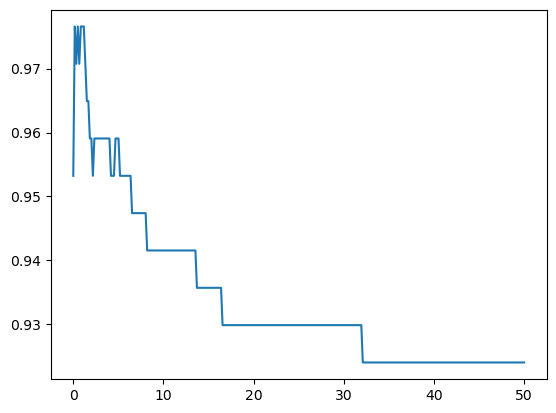

In [47]:
#参数C(松弛系数的惩罚力度):考虑了软间隔(异常点容忍的范围)的惩罚力度
#C值大,SVM会更好的分类训练数据,时间变长,可能过拟合
#如果数据噪音多,减少C
#C学习曲线的绘制
score = []
C_range = np.linspace(0.01,50,300)
for i in C_range:
    model = SVC(kernel = "linear",C = i, cache_size = 5000).fit(xtrain,ytrain)
    score.append(model.score(xtest,ytest))
    
print(max(score),C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

0.9766081871345029 0.13308808808808809


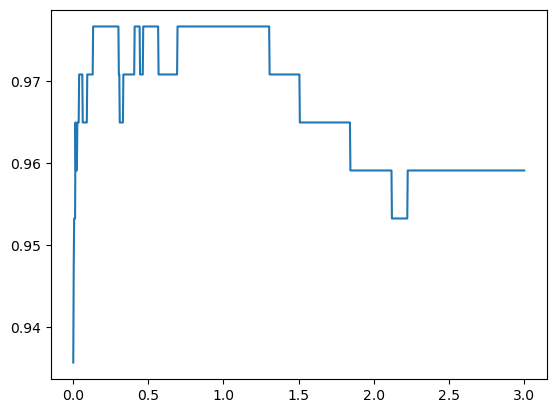

In [49]:
score = []
C_range = np.linspace(0.001,3,1000)
for i in C_range:
    model = SVC(kernel = "linear",C = i, cache_size = 5000).fit(xtrain,ytrain)
    score.append(model.score(xtest,ytest))
    
print(max(score),C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

0.9824561403508771 5.863903903903903


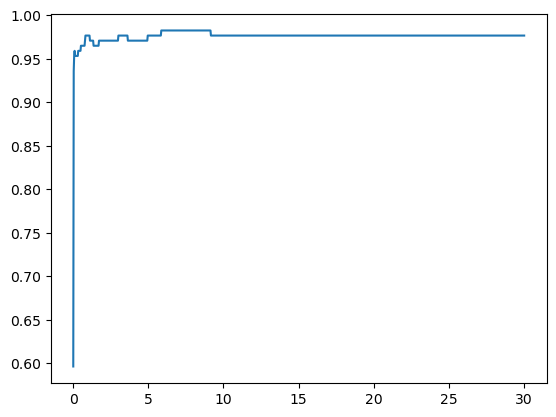

In [50]:
#换为rbf
score = []
C_range = np.linspace(0.01,30,1000)
for i in C_range:
    model = SVC(kernel = "rbf",C = i, gamma = 0.012915496650148827, cache_size = 5000).fit(xtrain,ytrain)
    score.append(model.score(xtest,ytest))
    
print(max(score),C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

0.9824561403508771 5.842625832583259


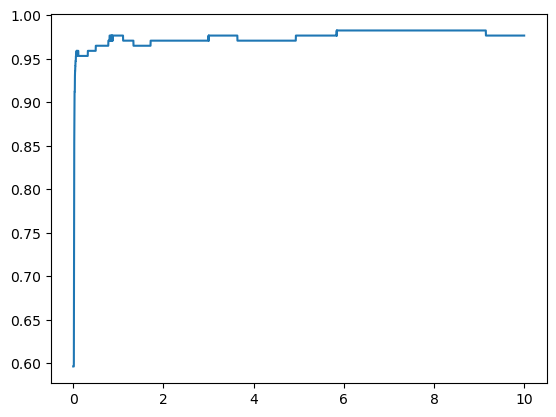

In [52]:
score = []
C_range = np.linspace(0.0001,10,10000)
for i in C_range:
    model = SVC(kernel = "rbf",C = i, gamma = 0.012915496650148827, cache_size = 5000).fit(xtrain,ytrain)
    score.append(model.score(xtest,ytest))
    
print(max(score),C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()